# Dimensions of Board

https://www.google.com/imgres?imgurl=https%3A%2F%2Fwp.nyu.edu%2Fmakerspace%2Fwp-content%2Fuploads%2Fsites%2F4304%2F2017%2F12%2FScreen-Shot-2017-12-20-at-10.50.01-AM.png&imgrefurl=http%3A%2F%2Fmakerspace.engineering.nyu.edu%2Fmakerspace-mini-grant%2Fhow-to-make-a-skateboard-from-scratch%2F&docid=-J8XjGGzJT6qnM&tbnid=W-eafoHYY00iDM%3A&vet=10ahUKEwi_kdqo_vLjAhUJTsAKHXEnA4MQMwinASgIMAg..i&w=813&h=522&bih=568&biw=1242&q=skateboard%20dimensions&ved=0ahUKEwi_kdqo_vLjAhUJTsAKHXEnA4MQMwinASgIMAg&iact=mrc&uact=8


$l_{tailx} = 5.75 inches = 14.6cm$

$l_{pan} = 10 inches = 25.4cm$

$l_{total} = 31.5 inches = 80cm$

$l_{tail2wheel} = 6 and 5/8 inches = 17.0cm$

$l_{wheel2wheel} = 80 - 2\times17.0cm=46cm$

$\theta_{pop} = 30^{\circ}$



In [173]:
# import libraries
import sympy as sym
import numpy as np
import math

sym.init_printing()
from IPython.display import display #for pretty printing

In [174]:
# DERIVE EOMS OF BOARD --------------------------------------------------------------------------------------------------------

# system parameters
g = sym.symbols('g')
mb = sym.symbols('m_{board}') # mass
lb = sym.symbols('l_{board}') # total length of board
lpan = sym.symbols('l_{pan}') # length of pan
lbr = sym.symbols('l_{wheels}') # length to reaction forces
ltail = sym.symbols('l_{tail}') # length of tail
hb = sym.symbols('h_{board}') # height - board clearance
Inb = sym.symbols('In_{board}') # moment of intertia
thtail = sym.symbols('\\theta_{pop}') # "pop" angle 56 degrees 

# generalized coordinates
x,y,thb = sym.symbols(['x','y','\\theta_{board}']) 
dx,dy,dthb = sym.symbols(['\dot{x}','\dot{y}','\dot{\\theta}_{board}']) 
ddx,ddy,ddthb = sym.symbols(['\ddot{x}','\ddot{y}','\ddot{\\theta}_{board}']) 

q = sym.Matrix([[x],[y],[thb]])
dq = sym.Matrix([[dx],[dy],[dthb]])
ddq = sym.Matrix([[ddx],[ddy],[ddthb]])

# forces
GRF_BW,GRF_FW = sym.symbols(['GRF_{BW}','GRF_{FW}']) # ground reaction forces
F_FF,F_BF = sym.symbols(['F_{FF}','F_{BF}']) # front and back foot applied forces

# STEP 1: position vectors ri = [x,y] (world frame)
rb = sym.Matrix([[x],
                [y]])
# the Jacobians
Jb = rb.jacobian(q)

# STEP 2: generate expressions for the system space velocities from the jacobians
vb = Jb*dq

# STEP 3: generate expressions for the kinetic and potential energy
# mass vectors
Mb = sym.Matrix([mb,mb])

T = 0.5*sym.transpose(Mb)*sym.matrix_multiply_elementwise(vb,vb)
T = T[0] + 0.5*Inb*dthb**2
V = mb*g*rb[1]

# STEP 4: calculate each term of the Lagrange equation
# term 1
Lg1 = sym.zeros(len(q),1)
for i in range(len(q)):
    dT_ddq = sym.Matrix([sym.diff(T,dq[i])]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = sym.Matrix([T]).jacobian(q).transpose() # partial of T in q

# term 4
Lg4 = sym.Matrix([V]).jacobian(q).transpose() # partial of U in q

# generalized forces

# applied forces
F_bf = sym.Matrix([[0],[-F_BF]])
F_ff = sym.Matrix([[0],[-F_FF]])

# ground forces acting on the board
GRF_bw = sym.Matrix([[0],[GRF_BW]])
GRF_fw = sym.Matrix([[0],[GRF_FW]])

# distance of forces
rGRF_bw = sym.Matrix([[x - 0.5*lbr*sym.cos(thb)+hb*sym.sin(thb)],
                      [y - 0.5*lbr*sym.sin(thb)-hb*sym.cos(thb)]])

rGRF_fw = sym.Matrix([[x + 0.5*lbr*sym.cos(thb)+hb*sym.sin(thb)],
                      [y + 0.5*lbr*sym.sin(thb)-hb*sym.cos(thb)]])

JGRF_bw = rGRF_bw.jacobian(q)
JGRF_fw = rGRF_fw.jacobian(q)

# PHASE 1 --------------------------------------------------------------------------------------------------------------------
# F_BF on the tail of the board, F_FF halfway up board, both wheels in contact with ground

rF_bf = sym.Matrix([[x - 0.5*lpan*sym.cos(thb)-ltail*sym.cos(thb-thtail)],
                    [y - 0.5*lpan*sym.sin(thb)-ltail*sym.sin(thb-thtail)]])

rF_ff = sym.Matrix([[x],
                    [y]])

JF_bf = rF_bf.jacobian(q)
JF_ff = rF_ff.jacobian(q)

Q = sym.zeros(len(q),1)
for j in range(len(q)):
    Q[j] = GRF_bw.transpose()*JGRF_bw[:,j]+GRF_fw.transpose()*JGRF_fw[:,j]+F_bf.transpose()*JF_bf[:,j]+F_ff.transpose()*JF_ff[:,j]

# Calculate equations of motion
EOM = Lg1 - Lg3 + Lg4 - Q

EOMs_p1 = sym.zeros(len(q),1)
for j in range(len(q)):
     EOMs_p1[j] = EOM[j].simplify()

# PHASE 2 --------------------------------------------------------------------------------------------------------------------
# F_BF on the tail of the board, F_FF halfway up board, back wheel in contact with ground

rF_bf = sym.Matrix([[x - 0.5*lpan*sym.cos(thb)-ltail*sym.cos(thb-thtail)],
                    [y - 0.5*lpan*sym.sin(thb)-ltail*sym.sin(thb-thtail)]])

rF_ff = sym.Matrix([[x],
                    [y]])

JF_bf = rF_bf.jacobian(q)
JF_ff = rF_ff.jacobian(q)

Q = sym.zeros(len(q),1)
for j in range(len(q)):
    Q[j] = GRF_bw.transpose()*JGRF_bw[:,j]+F_bf.transpose()*JF_bf[:,j]+F_ff.transpose()*JF_ff[:,j]

# Calculate equations of motion
EOM = Lg1 - Lg3 + Lg4 - Q

EOMs_p2 = sym.zeros(len(q),1)
for j in range(len(q)):
     EOMs_p2[j] = EOM[j].simplify()

# PHASE 3 --------------------------------------------------------------------------------------------------------------------
# F_BF on back wheel, F_FF on front wheel

# distance of forces
rF_bf = sym.Matrix([[x - 0.5*lbr*sym.cos(thb)],
                  [y - 0.5*lbr*sym.sin(thb)]])

rF_ff  = sym.Matrix([[x + 0.5*lbr*sym.cos(thb)],
                  [y + 0.5*lbr*sym.sin(thb)]])

JF_bf = rF_bf.jacobian(q)
JF_ff = rF_ff.jacobian(q)

Q = sym.zeros(len(q),1)
for j in range(len(q)):
    Q[j] = F_bf.transpose()*JF_bf[:,j]+F_ff.transpose()*JF_ff[:,j]

# Calculate equations of motion
EOM = Lg1 - Lg3 + Lg4 - Q

EOMs_p3 = sym.zeros(len(q),1)
for j in range(len(q)):
    EOMs_p3[j] = EOM[j].simplify()


# PHASE 4 --------------------------------------------------------------------------------------------------------------------
# F_BF on back wheel, F_FF on front wheel, both wheels in contact with ground

# distance of forces
rF_bf = sym.Matrix([[x - 0.5*lbr*sym.cos(thb)],
                  [y - 0.5*lbr*sym.sin(thb)]])

rF_ff  = sym.Matrix([[x + 0.5*lbr*sym.cos(thb)],
                  [y + 0.5*lbr*sym.sin(thb)]])

JF_bf = rF_bf.jacobian(q)
JF_ff = rF_ff.jacobian(q)

Q = sym.zeros(len(q),1)
for j in range(len(q)):
    Q[j] = GRF_bw.transpose()*JGRF_bw[:,j]+GRF_fw.transpose()*JGRF_fw[:,j]+F_bf.transpose()*JF_bf[:,j]+F_ff.transpose()*JF_ff[:,j]

# Calculate equations of motion
EOM = Lg1 - Lg3 + Lg4 - Q

EOMs_p4 = sym.zeros(len(q),1)
for j in range(len(q)):
    EOMs_p4[j] = EOM[j].simplify()

# print("PHASE 1")
# display(sym.solve(EOMs_p1, [ddq[0],ddq[1],ddq[2]]))
# print("PHASE 2")
# display(sym.solve(EOMs_p2, [ddq[0],ddq[1],ddq[2]]))
# print("PHASE 3")
# display(sym.solve(EOMs_p3, [ddq[0],ddq[1],ddq[2]]))
# print("PHASE 4")
# display(sym.solve(EOMs_p4, [ddq[0],ddq[1],ddq[2]]))

In [175]:
# Lambdify EOMs
from pyomo.environ import*
from pyomo.opt import SolverFactory
from pyomo.opt import SolverStatus, TerminationCondition

func_map = {'sin':sin, 'cos':cos} 

sym_list = [g,mb,lb,lpan,lbr,ltail,Inb,hb,thtail,
            x,y,thb,
            dx,dy,dthb,
            ddx,ddy,ddthb,
            F_BF,F_FF,GRF_BW,GRF_FW]
            
lambEOMx_p1   = sym.lambdify(sym_list,EOMs_p1[0],modules = [func_map])
lambEOMy_p1   = sym.lambdify(sym_list,EOMs_p1[1],modules = [func_map])
lambEOMthb_p1 = sym.lambdify(sym_list,EOMs_p1[2],modules = [func_map])

lambEOMx_p2   = sym.lambdify(sym_list,EOMs_p2[0],modules = [func_map])
lambEOMy_p2   = sym.lambdify(sym_list,EOMs_p2[1],modules = [func_map])
lambEOMthb_p2 = sym.lambdify(sym_list,EOMs_p2[2],modules = [func_map])

lambEOMx_p3   = sym.lambdify(sym_list,EOMs_p3[0],modules = [func_map])
lambEOMy_p3   = sym.lambdify(sym_list,EOMs_p3[1],modules = [func_map])
lambEOMthb_p3 = sym.lambdify(sym_list,EOMs_p3[2],modules = [func_map])

lambEOMx_p4   = sym.lambdify(sym_list,EOMs_p4[0],modules = [func_map])
lambEOMy_p4   = sym.lambdify(sym_list,EOMs_p4[1],modules = [func_map])
lambEOMthb_p4 = sym.lambdify(sym_list,EOMs_p4[2],modules = [func_map])

In [176]:
# rerun from here if you don't want to calculate the EOM's again
if 'm' in globals():
    del m # deletes the model
    
m = ConcreteModel()

# SETS-----------------------------------------------------------------------------------------------------------------------

N = 80
m.N = RangeSet(N)

N1 = 10 # end of phase 1
N2 = 30 # end of phase 2
N3 = 70 # end of phase 3

DOFs = ['x','y','thb'] # generalized coordinates
m.DOF = Set(initialize = DOFs) 

Fs = ['BF','FF'] # front foot, backfoot
m.Fs = Set(initialize = Fs) 

GRFs = ['BW','FW'] # front foot, backfoot
m.GRFs = Set(initialize = GRFs) 

# PARAMETERS-----------------------------------------------------------------------------------------------------------------

m.g = Param(initialize = 9.81) # gravity
m.mb = Param(initialize = 2.0) # mass of board
m.lpan = Param(initialize = 0.508) # length of pan
m.lbr = Param(initialize = 0.46) # length between wheels
m.hb = Param(initialize = 0.09) # board clearance
m.mhuman = Param(initialize = 70.0) # human weight
m.etail = Param(initialize = -0.8) # coefficient of restitution of tail
m.ewheels = Param(initialize = 0.0) # coefficient of restitution of tail
m.thtail = Param(initialize = 0.35) # 20 degrees

ltailx = 0.146 # 14.6cm
ltail = ltailx/math.cos(m.thtail.value)
m.ltail = Param(initialize = ltail) # length of tail
m.lb = Param(initialize = 2*ltailx+m.lpan) # horizontal length of board

hm  = 0.01 #master timestep

m.Inb1 = Param(initialize = 1/12*m.mb*m.lb**2+m.mb*(0.5*m.lbr)**2) # moment of inertia
m.Inb3 = Param(initialize = 1/12*m.mb*m.lb**2) # moment of inertia

# VARIABLES -----------------------------------------------------------------------------------------------------------------

# system coordinates
m.q = Var(m.N, m.DOF) # position
m.dq = Var(m.N, m.DOF) # velocity
m.ddq = Var(m.N, m.DOF) # acceleration

# forces
#m.F = Var(m.N, m.Fs, bounds = (0.0, 4*m.g*m.mhuman)) # Force from front foot > 0
m.F = Var(m.N, m.Fs, bounds = (0.0, None)) # Force from front foot > 0
m.GRF = Var(m.N, m.GRFs, bounds = (0.0, None)) # Ground reaction force on back wheel

# auxillary variables
m.ptail = Var(m.N, m.DOF) # back of board
m.pnose = Var(m.N, m.DOF) # front of board
m.pbackwheel = Var(m.N, m.DOF) # position of backwheel
m.pfrontwheel = Var(m.N, m.DOF) # position of frontwheel
m.vtail = Var(m.N, m.DOF) # velocity of back of board

def def_ptail(m,n,dof):
    if dof == 'x':
        return m.ptail[n, 'x'] == m.q[n,'x'] - 0.5*m.lpan*cos(m.q[n,'thb']) - m.ltail*cos(m.q[n,'thb']-m.thtail)
    if dof == 'y':
        return m.ptail[n, 'y'] == m.q[n,'y'] - 0.5*m.lpan*sin(m.q[n,'thb']) - m.ltail*sin(m.q[n,'thb']-m.thtail) 
    else:
        return Constraint.Skip
m.def_ptail = Constraint(m.N, m.DOF,rule = def_ptail)

def def_pnose(m,n,dof): 
    if dof == 'x':
        return m.pnose[n, 'x'] == m.q[n,'x'] + 0.5*m.lpan*cos(m.q[n,'thb'])+m.ltail*cos(m.q[n,'thb']+m.thtail)
    if dof == 'y':
        return m.pnose[n, 'y'] == m.q[n,'y'] + 0.5*m.lpan*sin(m.q[n,'thb'])+m.ltail*sin(m.q[n,'thb']+m.thtail)
    else:
        return Constraint.Skip
m.def_pnose = Constraint(m.N, m.DOF,rule = def_pnose)

def def_pbackwheel(m,n,dof):
    if dof == 'x':
        return m.pbackwheel[n, 'x'] == m.q[n,'x']-0.5*m.lbr*cos(m.q[n,'thb'])+m.hb*sin(m.q[n,'thb'])
    if dof == 'y':
        return m.pbackwheel[n, 'y'] == m.q[n,'y']-0.5*m.lbr*sin(m.q[n,'thb'])-m.hb*cos(m.q[n,'thb'])
    else:
        return Constraint.Skip
m.def_pbackwheel = Constraint(m.N, m.DOF,rule = def_pbackwheel)

def def_pfrontwheel(m,n,dof):
    if dof == 'x':
        return m.pfrontwheel[n, 'x'] == m.q[n,'x']+0.5*m.lbr*cos(m.q[n,'thb'])+m.hb*sin(m.q[n,'thb'])
    if dof == 'y':
        return m.pfrontwheel[n, 'y'] == m.q[n,'y']+0.5*m.lbr*sin(m.q[n,'thb'])-m.hb*cos(m.q[n,'thb'])
    else:
        return Constraint.Skip
m.def_pfrontwheel = Constraint(m.N, m.DOF,rule = def_pfrontwheel)

# def def_vtail(m,n,dof):
#     if dof == 'y':
#         #THIS IS WRONG
#         return m.vtail[n, 'y'] == m.dq[n,'y']-m.dq[n,'thb']*sqrt((m.ptail[n, 'x']-m.q[n,'x'])**2+(m.ptail[n, 'y']-m.q[n,'y'])**2)
#     else:
#         return Constraint.Skip
# m.def_vtail = Constraint(m.N, m.DOF,rule = def_vtail)
    
# bound variables
for n in range(1,N+1):
    m.pnose[n,'y'].setlb(0.0)
    m.ptail[n,'y'].setlb(0.0)
    m.pbackwheel[n,'y'].setlb(0.0)
    m.pfrontwheel[n,'y'].setlb(0.0)
    m.q[n,'thb'].setub(np.pi/2)
    m.q[n,'thb'].setlb(-np.pi/2)

# TIME AND INTEGRATION --------------------------------------------------------------------------------------------------------

# variable timestep
m.h = Var(m.N, bounds = (0.8,1.2))

# for n in range (1,N+1):
#     if n < N1:
#         m.h[n].setlb(1.6)
#         m.h[n].setub(2.4)
#     elif n < N2:
#         m.h[n].setlb(0.8)
#         m.h[n].setub(1.2)
#     elif n < N3:
#         m.h[n].setlb(0.8)
#         m.h[n].setub(1.2)
#     else:
#         m.h[n].setlb(1.6)
#         m.h[n].setub(2.4)

# Integration constraints 
def BwEuler_p(m,n,dof): # for positions
    if n > 1:
        return m.q[n,dof] == m.q[n-1,dof] + hm*m.h[n]*m.dq[n-1,dof]
    else:
        return Constraint.Skip #use this to leave out members of a set that the constraint doesn't apply to
m.integrate_p = Constraint(m.N, m.DOF, rule = BwEuler_p)

def BwEuler_v(m,n,dof): # for velocities
    if n > 1:
        if ((n == N2 or n == N3) and (dof == 'y')):
            return Constraint.Skip # to handle change of phase 
        else:
            return m.dq[n,dof] == m.dq[n-1,dof] + hm*m.h[n]*m.ddq[n-1,dof]
    else:
        return Constraint.Skip 
m.integrate_v = Constraint(m.N, m.DOF, rule = BwEuler_v)

# SWITCHING CONSTRAINT AT IMPACT ----------------------------------------------------------------------------------------------

def q_mapping(m,n): # mapping of q->q' at the impact of the "pop" and land
    # the "pop"
    if n == N2:
        #return m.dq[n,'y'] == m.etail*m.vtail[n-1,'y'] + m.dq[n-1,'y']
        return m.dq[n,'y'] == -m.dq[n-1,'y']
    # the landing
    elif n == N3:
        return m.dq[n,'y'] == 0.0
    else:
        return Constraint.Skip
m.q_mapping = Constraint(m.N, rule = q_mapping)

In [177]:
# -----------------------------------------------------------------------------------------------------------------------------
# EOMs 
# -----------------------------------------------------------------------------------------------------------------------------

# PHASE 1 ---------------------------------------------------------------------------------------------------------------------
def EOMx(m,n): # for x
    # list the model versions of all quantities in the same order as sym_list
    if n > N2 and n < N3:
        var_list = [m.g, m.mb, m.lb, m.lpan, m.lbr, m.ltail, m.Inb3, m.hb, m.thtail, 
                    m.q[n,'x'], m.q[n,'y'], m.q[n,'thb'],  
                    m.dq[n,'x'], m.dq[n,'y'], m.dq[n,'thb'], 
                    m.ddq[n,'x'], m.ddq[n,'y'], m.ddq[n,'thb'],
                    m.F[n,'BF'], m.F[n,'FF'], m.GRF[n,'BW'], m.GRF[n,'FW']] 
    else: 
        var_list = [m.g, m.mb, m.lb, m.lpan, m.lbr, m.ltail, m.Inb1, m.hb, m.thtail, 
                    m.q[n,'x'], m.q[n,'y'], m.q[n,'thb'],  
                    m.dq[n,'x'], m.dq[n,'y'], m.dq[n,'thb'], 
                    m.ddq[n,'x'], m.ddq[n,'y'], m.ddq[n,'thb'],
                    m.F[n,'BF'], m.F[n,'FF'], m.GRF[n,'BW'], m.GRF[n,'FW']] 
    # phases
    if n < N1:
        return lambEOMx_p1(*var_list) == 0
    elif n < N2-1:
        return lambEOMx_p2(*var_list) == 0
    elif n < N3:
        return lambEOMx_p3(*var_list) == 0
    else:
        return lambEOMx_p4(*var_list) == 0
m.EOMx = Constraint(m.N, rule = EOMx)

def EOMy(m,n): # for x
    # list the model versions of all quantities in the same order as sym_list
    if n > N2 and n < N3:
        var_list = [m.g, m.mb, m.lb, m.lpan, m.lbr, m.ltail, m.Inb3, m.hb, m.thtail, 
                    m.q[n,'x'], m.q[n,'y'], m.q[n,'thb'],  
                    m.dq[n,'x'], m.dq[n,'y'], m.dq[n,'thb'], 
                    m.ddq[n,'x'], m.ddq[n,'y'], m.ddq[n,'thb'],
                    m.F[n,'BF'], m.F[n,'FF'], m.GRF[n,'BW'], m.GRF[n,'FW']] 
    else: 
        var_list = [m.g, m.mb, m.lb, m.lpan, m.lbr, m.ltail, m.Inb1, m.hb, m.thtail, 
                    m.q[n,'x'], m.q[n,'y'], m.q[n,'thb'],  
                    m.dq[n,'x'], m.dq[n,'y'], m.dq[n,'thb'], 
                    m.ddq[n,'x'], m.ddq[n,'y'], m.ddq[n,'thb'],
                    m.F[n,'BF'], m.F[n,'FF'], m.GRF[n,'BW'], m.GRF[n,'FW']] 
    if n < N1:
        return lambEOMy_p1(*var_list) == 0
    elif n < N2-1:
        return lambEOMy_p2(*var_list) == 0
    elif n < N3:
        return lambEOMy_p3(*var_list) == 0
    else:
        return lambEOMy_p4(*var_list) == 0
m.EOMy = Constraint(m.N, rule = EOMy)

def EOMthb(m,n): # for x
    # list the model versions of all quantities in the same order as sym_list
    if n > N2 and n < N3:
        var_list = [m.g, m.mb, m.lb, m.lpan, m.lbr, m.ltail, m.Inb3, m.hb, m.thtail, 
                    m.q[n,'x'], m.q[n,'y'], m.q[n,'thb'],  
                    m.dq[n,'x'], m.dq[n,'y'], m.dq[n,'thb'], 
                    m.ddq[n,'x'], m.ddq[n,'y'], m.ddq[n,'thb'],
                    m.F[n,'BF'], m.F[n,'FF'], m.GRF[n,'BW'], m.GRF[n,'FW']] 
    else: 
        var_list = [m.g, m.mb, m.lb, m.lpan, m.lbr, m.ltail, m.Inb1, m.hb, m.thtail, 
                    m.q[n,'x'], m.q[n,'y'], m.q[n,'thb'],  
                    m.dq[n,'x'], m.dq[n,'y'], m.dq[n,'thb'], 
                    m.ddq[n,'x'], m.ddq[n,'y'], m.ddq[n,'thb'],
                    m.F[n,'BF'], m.F[n,'FF'], m.GRF[n,'BW'], m.GRF[n,'FW']] 
    # phases
    if n < N1:
        return lambEOMthb_p1(*var_list) == 0
    elif n < N2-1:
        return lambEOMthb_p2(*var_list) == 0
    elif n < N3:
        return lambEOMthb_p3(*var_list) == 0
    else:
        return lambEOMthb_p4(*var_list) == 0
m.EOMthb = Constraint(m.N, rule = EOMthb)

# OTHER CONSTRAINTS -----------------------------------------------------------------------------------------------------------

def def_pBackWheel(m,n): # for fixing backwheel to the ground
    if (n<=N2) or (n>N3):
        return m.pbackwheel[n,'y'] == 0
    else:
        return Constraint.Skip
m.def_pBackWheel = Constraint(m.N, rule = def_pBackWheel)

def def_pFrontWheel(m,n): # for fixing frontwheel to the ground
    if (n<=N1) or (n>N3):
        return m.pfrontwheel[n,'y'] == 0
    else:
        return Constraint.Skip
m.def_pFrontWheel = Constraint(m.N, rule = def_pFrontWheel)

# def BodyWeight(m,n): # forces must represent bodyweight
#     #if (n<N1) or (n>=N3):
#     if (n<N1):
#         return m.F[n,'BF']+m.F[n,'FF'] == m.g*m.mhuman
#     else:
#         return Constraint.Skip
# m.BodyWeight = Constraint(m.N, rule = BodyWeight)

In [178]:
# COST FUNCTION ---------------------------------------------------------------------------------------------------------------
# minimum time and minimum reaction penalties

def CostFun(m):
    T = sum(m.h[n] for n in range(1,N+1))
    force_sum = 0
    df_sum = 0
    for n in range(1,N+1):
        force_sum += m.F[n,'BF']+m.F[n,'FF']
        if n>1:
            df_sum += abs(m.F[n,'BF']-m.F[n-1,'BF'])+ abs(m.F[n,'FF']-m.F[n-1,'FF'])
    return T+1000*force_sum #+ 10*df_sum
m.Cost = Objective(rule = CostFun)

In [179]:
# OLLIE MANOEUVRE -----------------------------------------------------------------------------------------------------------
# Flat, rotate, pop, airborne, land

# STANDING -------------------------------------------------------------------------------------------------------------------
# phase 1 initial conditions
m.q[1,'x'].fix(0.0)
m.q[1,'thb'].fix(0.0)

m.dq[1,'x'].fix(1.0)
m.dq[1,'y'].fix(0.0)
m.dq[1,'thb'].fix(0.0)

m.pbackwheel [1,'y'].fix(0.0)
m.pfrontwheel[1,'y'].fix(0.0)

# ----------------------------------------------------------------------------------------------------------------------------
# STANDING FINAL CONDITIONS
# PRE-POP INITIAL CONDITIONS
# ----------------------------------------------------------------------------------------------------------------------------
m.q[N1,'thb'].fix(0.0)
m.dq[N1,'y'].fix(0.0)
m.dq[N1,'thb'].fix(0.0)

m.pbackwheel[N1,'y'].fix(0.0)
m.pfrontwheel[N1,'y'].fix(0.0)

# ----------------------------------------------------------------------------------------------------------------------------
# PRE-POP FINAL CONDITIONS
# AIRBORN INITIAL CONDITIONS
# ----------------------------------------------------------------------------------------------------------------------------

m.ptail[N2,'y'].fix(0.0)
m.pbackwheel[N2,'y'].fix(0.0)

# AIRBORN INTERMEDIATE CONDITION ----------------------------------------------------------------------------------------------

Nhw = N2+round((N3-N2)/2)
#m.q[Nhw,'y'].setlb(0.25)
#m.dq[Nhw,'y'].fix(0.0)

# ----------------------------------------------------------------------------------------------------------------------------
# AIRBORN FINAL CONDITIONS
# LANDING INITIAL CONDITIONS
# ----------------------------------------------------------------------------------------------------------------------------

m.q[N3,'thb'].fix(0.0) 
m.pbackwheel[N3,'y'].fix(0.0) 
m.pfrontwheel[N3,'y'].fix(0.0)

m.pbackwheel[N,'y'].fix(0.0) 
m.pfrontwheel[N,'y'].fix(0.0)
m.dq[N,'y'].fix(0.0)
m.ddq[N,'y'].fix(0.0)

# INITIALIZE ---------------------------------------------------------------------------------------------------------------

# for i in range(1,N+1):
#     if i != N1 or i != N2 or i != N3 or i != N:
#         m.q[i,'y'].value    = q_y_guide[i]
#         m.q[i,'thb'].value  = q_thb_guide[i]
#         m.dq[i,'y'].value   = dq_y_guide[i]
#         m.dq[i,'thb'].value = dq_y_guide[i]

#         m.F[i,'FF'].value = F_FF_guide[i]
#         m.F[i,'BF'].value = F_BF_guide[i]

#         m.GRF[i,'FW'].value = GRF_FW_guide[i]
#         m.GRF[i,'BW'].value = GRF_BW_guide[i]
        
#         m.h[i].value = h_guide[i]

In [180]:
#m.pprint()

In [181]:
# Solve -----------------------------------------------------------------------------------------------------------------------
opt = SolverFactory('ipopt') # standard issue, garden variety ipopt

# solver options
opt.options["expect_infeasible_problem"] = 'yes'
opt.options["print_level"] = 5 # prints a log with each iteration (you want to this - it's the only way to see progress.)
opt.options["max_iter"] = 50000 # maximum number of iterations
opt.options["max_cpu_time"] = 10*60 # maximum cpu time in seconds
opt.options["Tol"] = 1e-6 # the tolerance for feasibility. Considers constraints satisfied when they're within this margin.
    
results = opt.solve(m, tee=True) 

Ipopt 3.11.1: expect_infeasible_problem=yes
print_level=5
max_iter=50000
max_cpu_time=600
Tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:     4529
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      726

Total number of variables............................:     1638
                     variables with only l

In [182]:
print(results.solver.status) # tells you if the solver had any errors/ warnings
print(results.solver.termination_condition) # tells you if the solution was (locally) optimal, feasible, or neither.

warning
infeasible


In [183]:
maxForce = 0
maxGRF = 0
for i in range(1,N+1):
    if m.F[i,'FF'].value>maxForce:
        maxForce = m.F[i,'FF'].value
    if m.F[i,'BF'].value>maxForce:
        maxForce = m.F[i,'BF'].value
    if m.GRF[i,'FW'].value is not None: 
        if m.GRF[i,'FW'].value>maxGRF:
             maxGRF = m.GRF[i,'FW'].value
    if m.GRF[i,'BW'].value is not None:
        if m.GRF[i,'BW'].value>maxGRF:
            maxGRF = m.GRF[i,'BW'].value

In [184]:
# store all variables for extrapolation
from scipy.interpolate import interp1d

#initialize time dependent arrays
q_x_ar = np.zeros(N)
q_y_ar = np.zeros(N)
q_thb_ar = np.zeros(N)

ptail_x_ar = np.zeros(N)
ptail_y_ar = np.zeros(N)
pnose_x_ar = np.zeros(N)
pnose_y_ar = np.zeros(N)

pbackwheel_x_ar = np.zeros(N)
pbackwheel_y_ar = np.zeros(N)
pfrontwheel_x_ar = np.zeros(N)
pfrontwheel_y_ar = np.zeros(N)

F_FF_ar = np.zeros(N)
F_BF_ar = np.zeros(N)

GRF_FW_ar = np.zeros(N)
GRF_BW_ar = np.zeros(N)
h_ar = np.zeros(N)

# fill arrays with solver values
for i in range (1,N+1):
    q_x_ar[i-1]    = m.q[i,'x'].value
    q_y_ar[i-1]    = m.q[i,'y'].value
    q_thb_ar[i-1]  = m.q[i,'thb'].value

    ptail_x_ar[i-1] = m.ptail[i,'x'].value
    ptail_y_ar[i-1] = m.ptail[i,'y'].value
    pnose_x_ar[i-1] = m.pnose[i,'x'].value
    pnose_y_ar[i-1] = m.pnose[i,'y'].value
    
    pbackwheel_x_ar[i-1] = m.pbackwheel[i,'x'].value
    pbackwheel_y_ar[i-1] = m.pbackwheel[i,'y'].value
    pfrontwheel_x_ar[i-1] = m.pfrontwheel[i,'x'].value
    pfrontwheel_y_ar[i-1] = m.pfrontwheel[i,'y'].value
    
    F_FF_ar[i-1] = m.F[i,'FF'].value
    F_BF_ar[i-1] = m.F[i,'BF'].value
    
    GRF_FW_ar[i-1] = m.GRF[i,'FW'].value
    GRF_BW_ar[i-1] = m.GRF[i,'BW'].value
    
    h_ar[i-1] = m.h[i].value*hm

# calculate the time array. 
t_ar = np.cumsum(h_ar)

# caculate the interpolation functions.
f_x_interp = interp1d(t_ar, q_x_ar, kind='cubic')
f_y_interp = interp1d(t_ar, q_y_ar, kind='cubic')
f_thb_interp = interp1d(t_ar, q_thb_ar, kind='cubic')

f_ptail_x_interp = interp1d(t_ar, ptail_x_ar, kind='cubic')
f_ptail_y_interp = interp1d(t_ar, ptail_y_ar, kind='cubic')
f_pnose_x_interp = interp1d(t_ar, pnose_x_ar, kind='cubic')
f_pnose_y_interp = interp1d(t_ar, pnose_y_ar, kind='cubic')

f_pbackwheel_x_interp = interp1d(t_ar, pbackwheel_x_ar, kind='cubic')
f_pbackwheel_y_interp = interp1d(t_ar, pbackwheel_y_ar, kind='cubic')
f_pfrontwheel_x_interp = interp1d(t_ar, pfrontwheel_x_ar, kind='cubic')
f_pfrontwheel_y_interp = interp1d(t_ar, pfrontwheel_y_ar, kind='cubic')

f_F_FF_interp = interp1d(t_ar, F_FF_ar, kind='next')
f_F_BF_interp = interp1d(t_ar, F_BF_ar, kind='next')

f_GRF_FW_interp = interp1d(t_ar, GRF_FW_ar, kind='next')
f_GRF_BW_interp = interp1d(t_ar, GRF_BW_ar, kind='next')

# the desired time steps of 0.01s (100Hz)
Ts = hm
t_d = np.arange(0.02, t_ar[-1], Ts)

# sample the interpolation functions at 50Hz.
q_x_interp = f_x_interp(t_d)
q_y_interp = f_y_interp(t_d)
q_thb_interp = f_thb_interp(t_d)

ptail_x_interp = f_ptail_x_interp(t_d)
ptail_y_interp = f_ptail_y_interp(t_d)
pnose_x_interp = f_pnose_x_interp(t_d)
pnose_y_interp = f_pnose_y_interp(t_d)

pbackwheel_x_interp = f_pbackwheel_x_interp(t_d)
pbackwheel_y_interp = f_pbackwheel_y_interp(t_d)
pfrontwheel_x_interp = f_pfrontwheel_x_interp(t_d)
pfrontwheel_y_interp = f_pfrontwheel_y_interp(t_d)

F_FF_interp = f_F_FF_interp(t_d)
F_BF_interp = f_F_BF_interp(t_d)

GRF_FW_interp = f_GRF_FW_interp(t_d)
GRF_BW_interp = f_GRF_BW_interp(t_d)

# number of samples
N_interp = len(t_d) 

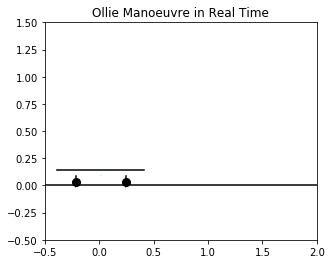

In [185]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes
ax1.set_aspect('equal')

def plot_board(i,m,ax): #update function for animation
    ax.clear()
    ax1.set_title('Ollie Manoeuvre in Real Time')
    ax.set_xlim([-0.5,2])
    ax.set_ylim([-0.5,1.5])
    
    #plot ground
    groundLx = -1
    groundLy = 0
    groundRx = 2.0
    groundRy = 0
    ax.plot([groundLx,groundRx],[groundLy,groundRy],color='xkcd:black')
    
    #plot skateboard
    boardLx = ptail_x_interp[i]
    boardLy = ptail_y_interp[i]
    boardRx = pnose_x_interp[i]
    boardRy = pnose_y_interp[i]
    ax.plot([boardLx,boardRx],[boardLy,boardRy],color='xkcd:black')
    
    #plot left wheel
    leftwheelTopx = q_x_interp[i]-0.5*m.lbr*np.cos(q_thb_interp[i])
    leftwheelTopy = q_y_interp[i]-0.5*m.lbr*np.sin(q_thb_interp[i])
    leftwheelBottomx = pbackwheel_x_interp[i]
    leftwheelBottomy = pbackwheel_y_interp[i]
    ax.plot([leftwheelTopx,leftwheelBottomx],[leftwheelTopy,leftwheelBottomy],color='xkcd:black')
    
    #plot left wheel-wheel
    leftwheelx = q_x_interp[i]-0.5*m.lbr*cos(q_thb_interp[i])+0.6*m.hb*sin(q_thb_interp[i])
    leftwheely = q_y_interp[i]-0.5*m.lbr*sin(q_thb_interp[i])-0.6*m.hb*cos(q_thb_interp[i])
    ax.plot(leftwheelx,leftwheely,color='xkcd:black',marker = 'o',markersize=8)
    
    #plot right wheel
    rightwheelTopx = q_x_interp[i]+0.5*m.lbr*np.cos(q_thb_interp[i])
    rightwheelTopy = q_y_interp[i]+0.5*m.lbr*np.sin(q_thb_interp[i])
    rightwheelBottomx = pfrontwheel_x_interp[i]
    rightwheelBottomy = pfrontwheel_y_interp[i]
    ax.plot([rightwheelTopx,rightwheelBottomx],[rightwheelTopy,rightwheelBottomy],color='xkcd:black')
    
    #plot right wheel-wheel
    rightwheelx = q_x_interp[i]+0.5*m.lbr*cos(q_thb_interp[i])+0.6*m.hb*sin(q_thb_interp[i])
    rightwheely = q_y_interp[i]+0.5*m.lbr*sin(q_thb_interp[i])-0.6*m.hb*cos(q_thb_interp[i])
    ax.plot(rightwheelx,rightwheely,color='xkcd:black',marker = 'o',markersize=8)
    
    #plot forces
    magforceBF = F_BF_interp[i]/maxForce
    magforceFF = F_FF_interp[i]/maxForce
    
    if i<N2:
        backforcex = boardLx
        backforcey = boardLy
        frontforcex = q_x_interp[i]
        frontforcey = q_y_interp[i]
    else:
        backforcex = leftwheelTopx
        backforcey = leftwheelTopy
        frontforcex = rightwheelTopx
        frontforcey = rightwheelTopy        
    
    ax.arrow(backforcex, backforcey+magforceBF*0.5,0,-magforceBF*0.5, length_includes_head=True,head_width=magforceBF*0.05,color='red')
    ax.arrow(frontforcex, frontforcey+magforceFF*0.5,0,-magforceFF*0.5, length_includes_head=True,head_width=magforceFF*0.05,color='red')
    
    #plot GRF's
    if GRF_BW_interp[i] is not None:
        magGRFBW = GRF_BW_interp[i]/maxGRF
    else: 
        magGRFBW = 0
    if GRF_FW_interp[i] is not None:
        magGRFFW = GRF_FW_interp[i]/maxGRF
    else: 
        magGRFFW = 0
        
    backGRFx = leftwheelBottomx
    backGRFy = leftwheelBottomy
    frontGRFx = rightwheelBottomx
    frontGRFy = rightwheelBottomy        

    ax.arrow(backGRFx, backGRFy-magGRFBW*0.5,0,magGRFBW*0.5, length_includes_head=True,head_width=magGRFBW*0.05,color='blue')
    ax.arrow(frontGRFx, frontGRFy-magGRFFW*0.5,0,magGRFFW*0.5, length_includes_head=True,head_width=magGRFFW*0.05,color='blue')

update = lambda i: plot_board(i,m,ax1) #lambdify update function

# animate it - interval is in ms
animate = ani.FuncAnimation(fig1,update,frames=range(0,N_interp),interval=Ts*1000,repeat=True)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook


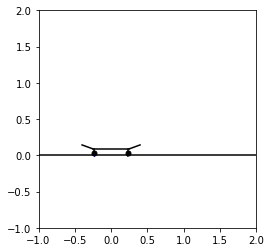

In [186]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes
ax1.set_aspect('equal')

def plot_board(i,m,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-1,2])
    ax.set_ylim([-1,2])
    
    #plot ground
    groundLx = -1
    groundLy = 0
    groundRx = 2
    groundRy = 0
    ax.plot([groundLx,groundRx],[groundLy,groundRy],color='xkcd:black')
    
    #plot pan
    boardLx = m.q[i,'x'].value-0.5*m.lpan*cos(m.q[i,'thb'].value)
    boardLy = m.q[i,'y'].value-0.5*m.lpan*sin(m.q[i,'thb'].value)
    boardRx = m.q[i,'x'].value+0.5*m.lpan*cos(m.q[i,'thb'].value)
    boardRy = m.q[i,'y'].value+0.5*m.lpan*sin(m.q[i,'thb'].value)
    ax.plot([boardLx,boardRx],[boardLy,boardRy],color='xkcd:black') 
    
    #plot tail and nose
    tailx = m.ptail[i,'x'].value
    taily = m.ptail[i,'y'].value
    nosex = m.pnose[i,'x'].value
    nosey = m.pnose[i,'y'].value
    ax.plot([boardLx,tailx],[boardLy,taily],color='xkcd:black')
    ax.plot([boardRx,nosex],[boardRy,nosey],color='xkcd:black')
    
    #plot left wheel
    leftwheelTopx = m.q[i,'x'].value-0.5*m.lbr*np.cos(m.q[i,'thb'].value)
    leftwheelTopy = m.q[i,'y'].value-0.5*m.lbr*np.sin(m.q[i,'thb'].value)
    leftwheelBottomx = m.pbackwheel[i,'x'].value
    leftwheelBottomy = m.pbackwheel[i,'y'].value
    ax.plot([leftwheelTopx,leftwheelBottomx],[leftwheelTopy,leftwheelBottomy],color='xkcd:black')
    
    #plot left wheel-wheel
    leftwheelx = m.q[i,'x'].value-0.5*m.lbr*cos(m.q[i,'thb'].value)+0.6*m.hb*sin(m.q[i,'thb'].value)
    leftwheely = m.q[i,'y'].value-0.5*m.lbr*sin(m.q[i,'thb'].value)-0.6*m.hb*cos(m.q[i,'thb'].value)
    ax.plot(leftwheelx,leftwheely,color='xkcd:black',marker = 'o',markersize=5)
    
    #plot right wheel
    rightwheelTopx = m.q[i,'x'].value+0.5*m.lbr*np.cos(m.q[i,'thb'].value)
    rightwheelTopy = m.q[i,'y'].value+0.5*m.lbr*np.sin(m.q[i,'thb'].value)
    rightwheelBottomx = m.pfrontwheel[i,'x'].value
    rightwheelBottomy = m.pfrontwheel[i,'y'].value
    ax.plot([rightwheelTopx,rightwheelBottomx],[rightwheelTopy,rightwheelBottomy],color='xkcd:black')
    
    #plot right wheel-wheel
    rightwheelx = m.q[i,'x'].value+0.5*m.lbr*cos(m.q[i,'thb'].value)+0.6*m.hb*sin(m.q[i,'thb'].value)
    rightwheely = m.q[i,'y'].value+0.5*m.lbr*sin(m.q[i,'thb'].value)-0.6*m.hb*cos(m.q[i,'thb'].value)
    ax.plot(rightwheelx,rightwheely,color='xkcd:black',marker = 'o',markersize=5)
    
    #plot forces
    magforceBF = m.F[i,'BF'].value/maxForce
    magforceFF = m.F[i,'FF'].value/maxForce
    
    if i<N2:
        backforcex = boardLx
        backforcey = boardLy
        frontforcex = m.q[i,'x'].value
        frontforcey = m.q[i,'y'].value
    else:
        backforcex = leftwheelTopx
        backforcey = leftwheelTopy
        frontforcex = rightwheelTopx
        frontforcey = rightwheelTopy        
    
    ax.arrow(backforcex, backforcey+magforceBF*0.5,0,-magforceBF*0.5, length_includes_head=True,head_width=magforceBF*0.05,color='red')
    ax.arrow(frontforcex, frontforcey+magforceFF*0.5,0,-magforceFF*0.5, length_includes_head=True,head_width=magforceFF*0.05,color='red')
    
    #plot GRF's
    if m.GRF[i,'BW'].value is not None:
        magGRFBW = m.GRF[i,'BW'].value/maxGRF
    else: 
        magGRFBW = 0
    if m.GRF[i,'FW'].value is not None:
        magGRFFW = m.GRF[i,'FW'].value/maxGRF
    else: 
        magGRFFW = 0
        
    backGRFx = leftwheelBottomx
    backGRFy = leftwheelBottomy
    frontGRFx = rightwheelBottomx
    frontGRFy = rightwheelBottomy        

    ax.arrow(backGRFx, backGRFy-magGRFBW*0.5,0,magGRFBW*0.5, length_includes_head=True,head_width=magGRFBW*0.05,color='blue')
    ax.arrow(frontGRFx, frontGRFy-magGRFFW*0.5,0,magGRFFW*0.5, length_includes_head=True,head_width=magGRFFW*0.05,color='blue')

update = lambda i: plot_board(i,m,ax1) #lambdify update function

#animate = ani.FuncAnimation(fig1,update,frames=frame_t,interval = 80,repeat=True)
animate = ani.FuncAnimation(fig1,update,frames=range(1,N+1),interval =20,repeat=True)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook


In [187]:
print(m.ptail[9,'x'].value - m.pnose[9,'x'].value)

-0.8


In [188]:
# print(results.solver.status) # tells you if the solver had any errors/ warnings
# print(results.solver.termination_condition) # tells you if the solution was (locally) optimal, feasible, or neither.

In [189]:
# q_y_guide = np.zeros(N+1)
# dq_y_guide = np.zeros(N+1)
# q_thb_guide = np.zeros(N+1)
# dq_thb_guide = np.zeros(N+1)
# F_FF_guide = np.zeros(N+1)
# F_BF_guide = np.zeros(N+1)
# GRF_FW_guide = np.zeros(N+1)
# GRF_BW_guide = np.zeros(N+1)
# h_guide = np.zeros(N+1)

# for i in range (1,N+1):
#     q_y_guide[i]    = m.q[i,'y'].value
#     q_thb_guide[i]  = m.q[i,'thb'].value
#     dq_y_guide[i]   = m.dq[i,'y'].value
#     dq_thb_guide[i] = m.dq[i,'thb'].value
    
#     F_FF_guide[i] = m.F[i,'FF'].value
#     F_BF_guide[i] = m.F[i,'BF'].value
    
#     GRF_FW_guide[i] = m.GRF[i,'FW'].value
#     GRF_BW_guide[i] = m.GRF[i,'BW'].value
    
#     h_guide[i] = m.h[i].value


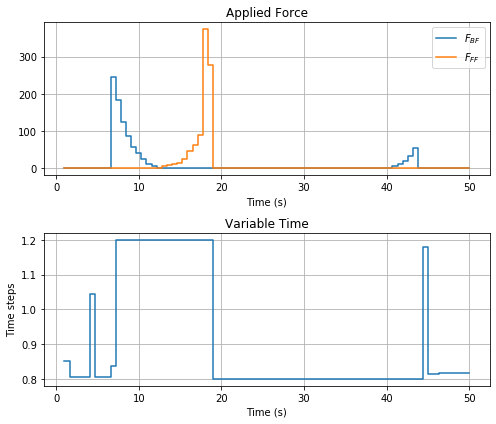

In [190]:
# Plot some of the variables
F_BFar = [m.F[i,'BF']() for i in range(1,N+1)]
F_FFar  = [m.F[i,'FF']() for i in range (1,N+1)]
tarr = [m.h[i]() for i in range (1,N+1)]

nar = np.linspace(1,50,N)

t = hm*np.cumsum(np.asarray(tarr))
t -= t[0]

plt.figure(figsize=(7, 6))
plt.subplot(2,1,1)
plt.step(nar, F_BFar,where='post')
plt.step(nar, F_FFar,where='post')
plt.title('Applied Force')
plt.xlabel('Time (s)')
plt.legend([r'$F_{BF}$',r'$F_{FF}$'])
plt.grid(True)

plt.subplot(2,1,2)
plt.step(nar,tarr,where ='post')
plt.title('Variable Time')
plt.xlabel('Time (s)')
plt.ylabel('Time steps')
plt.grid(True)

plt.tight_layout()

In [191]:
m.h.pprint()
#print(np.sum(h_ar[9:69]))

h : Size=80, Index=N
    Key : Lower : Value              : Upper : Fixed : Stale : Domain
      1 :   0.8 : 0.8514249642326073 :   1.2 : False : False :  Reals
      2 :   0.8 : 0.8041313941916917 :   1.2 : False : False :  Reals
      3 :   0.8 : 0.8042353243777239 :   1.2 : False : False :  Reals
      4 :   0.8 : 0.8042524133489503 :   1.2 : False : False :  Reals
      5 :   0.8 : 0.8042903747869699 :   1.2 : False : False :  Reals
      6 :   0.8 : 1.0436465443752005 :   1.2 : False : False :  Reals
      7 :   0.8 : 0.8044782034551097 :   1.2 : False : False :  Reals
      8 :   0.8 : 0.8045253593710707 :   1.2 : False : False :  Reals
      9 :   0.8 : 0.8055513896092722 :   1.2 : False : False :  Reals
     10 :   0.8 : 0.8373197399437059 :   1.2 : False : False :  Reals
     11 :   0.8 : 1.1999999518250426 :   1.2 : False : False :  Reals
     12 :   0.8 : 1.1999999330154134 :   1.2 : False : False :  Reals
     13 :   0.8 : 1.1999999058206108 :   1.2 : False : False :  Reals